In [1]:
import torch
from vae import VAE
from train import train_vae

from torch.utils.data import DataLoader, TensorDataset

# Create dummy dataset of shape (1000, 5) for x in R^5
dummy_data = torch.randn(1000, 5)
dataset = TensorDataset(dummy_data)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize the VAE with input_dim=5 and latent_dim=2
vae = VAE(input_dim=5, latent_dim=2, hidden_dim=16)

# Train the VAE
train_vae(vae, dataloader, epochs=10)


Epoch 1/10, Loss: 5.180718914031982
Epoch 2/10, Loss: 5.1039052581787105
Epoch 3/10, Loss: 5.075004329681397
Epoch 4/10, Loss: 5.054818614959717
Epoch 5/10, Loss: 5.048246290206909
Epoch 6/10, Loss: 5.0562817573547365
Epoch 7/10, Loss: 5.048147453308106
Epoch 8/10, Loss: 5.040781433105469
Epoch 9/10, Loss: 5.03646106338501
Epoch 10/10, Loss: 4.997275115966797


In [2]:
import numpy as np

# Number of data points
num_points = 10000

# Radius of hemisphere
radius = 1.0

# Randomly sample theta and phi angles
theta = np.random.uniform(0, np.pi/2, num_points)
phi = np.random.uniform(0, 2*np.pi, num_points)

# Convert the sampled angles to Cartesian coordinates
x = radius * np.sin(theta) * np.cos(phi)
y = radius * np.sin(theta) * np.sin(phi)
z = radius * np.cos(theta)

# Stack the coordinates together to get the data
hemisphere_data = np.vstack((x, y, z)).T

hemisphere_data.shape


(10000, 3)

In [3]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert the numpy array to a PyTorch tensor
hemisphere_tensor = torch.from_numpy(hemisphere_data).float()

# Wrap the tensor in a TensorDataset and DataLoader
hemisphere_dataset = TensorDataset(hemisphere_tensor)
hemisphere_dataloader = DataLoader(hemisphere_dataset, batch_size=1024, shuffle=True)

hemisphere_tensor.shape


torch.Size([10000, 3])

In [4]:

# Initialize the VAE with input_dim=5 and latent_dim=2
vae = VAE(input_dim=3, latent_dim=2, hidden_dim=64)

# Train the VAE
train_vae(vae, hemisphere_dataloader, epochs=100, learning_rate=1e-2, beta=0.2)

Epoch 1/100, Loss: 0.6952235046386719
Epoch 2/100, Loss: 0.6081832397460938
Epoch 3/100, Loss: 0.5791999481201172
Epoch 4/100, Loss: 0.5415103332519531
Epoch 5/100, Loss: 0.4999822662353516
Epoch 6/100, Loss: 0.4665392333984375
Epoch 7/100, Loss: 0.45267952880859375
Epoch 8/100, Loss: 0.4476219207763672
Epoch 9/100, Loss: 0.4456560729980469
Epoch 10/100, Loss: 0.44657281494140627
Epoch 11/100, Loss: 0.4466617889404297
Epoch 12/100, Loss: 0.4431508209228516
Epoch 13/100, Loss: 0.44405257263183595
Epoch 14/100, Loss: 0.44127010498046876
Epoch 15/100, Loss: 0.44088761901855467
Epoch 16/100, Loss: 0.44433968200683593
Epoch 17/100, Loss: 0.44566692810058595
Epoch 18/100, Loss: 0.4453634368896484
Epoch 19/100, Loss: 0.44553216857910155
Epoch 20/100, Loss: 0.4405615692138672
Epoch 21/100, Loss: 0.4437298858642578
Epoch 22/100, Loss: 0.4426825469970703
Epoch 23/100, Loss: 0.44123933410644534
Epoch 24/100, Loss: 0.4412386779785156
Epoch 25/100, Loss: 0.4447259918212891
Epoch 26/100, Loss: 0.448

In [5]:
# Pass the hemisphere data through the VAE to get the reconstructed data
with torch.no_grad():
    reconstructed, mu, logvar = vae(hemisphere_tensor)
    reconstr_mean = vae.decoder(mu)

# Convert the reconstructed data to numpy for visualization
reconstructed_data = reconstructed.numpy()
latent_mu = mu
latent_mu_data = mu.numpy()
latent_logvar = logvar.numpy()
reconstr_mean = reconstr_mean.numpy()
reconstructed_data.shape


(10000, 3)

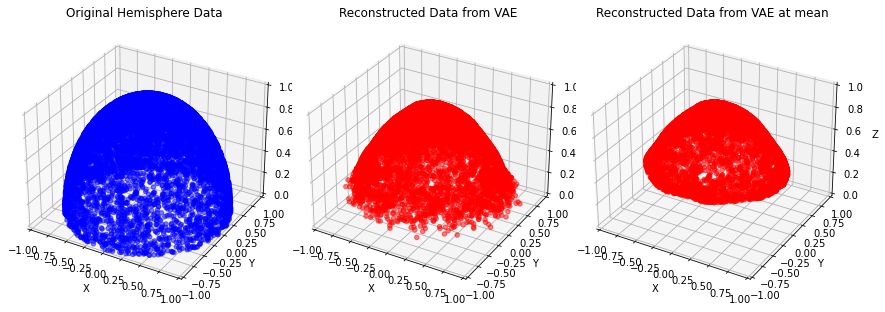

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))

# Plot original data
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(hemisphere_data[:, 0], hemisphere_data[:, 1], hemisphere_data[:, 2], c='b', marker='o', alpha=0.5)
ax1.set_title("Original Hemisphere Data")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax1.set_zlim([0, 1])

# Plot reconstructed data
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], reconstructed_data[:, 2], c='r', marker='o', alpha=0.5)
ax2.set_title("Reconstructed Data from VAE")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([0, 1])

# Plot reconstructed data
ax2 = fig.add_subplot(133, projection='3d')
ax2.scatter(reconstr_mean[:, 0], reconstr_mean[:, 1], reconstr_mean[:, 2], c='r', marker='o', alpha=0.5)
ax2.set_title("Reconstructed Data from VAE at mean")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([0, 1])

plt.tight_layout()
plt.show()


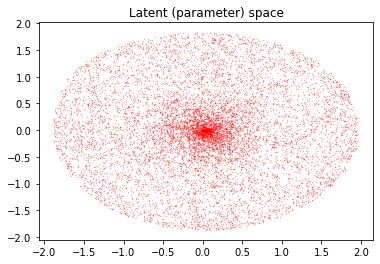

In [68]:
plt.scatter(latent_mu_data[:,0], latent_mu_data[:,1], c='r', marker='o', alpha=0.5, s=0.1)
plt.title("Latent (parameter) space")
plt.show()

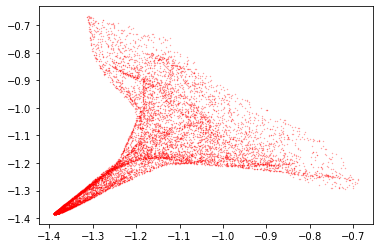

In [8]:
plt.scatter(latent_logvar[:,0], latent_logvar[:,1], c='r', marker='o', alpha=0.5, s=0.1)
plt.show()

In [12]:
from jacobian import compute_jacobian

In [17]:
jac = compute_jacobian(vae, latent_mu)

In [22]:
jac0 = jac[0].detach()

In [23]:
jac0

tensor([[ 0.2881,  0.1385],
        [ 0.2950,  0.3930],
        [ 0.1968, -0.1661]])

/var/folders/g2/pxzr9j95129bz38p7d4l_91r0000gn/T/ipykernel_53611/1626585071.py:12: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


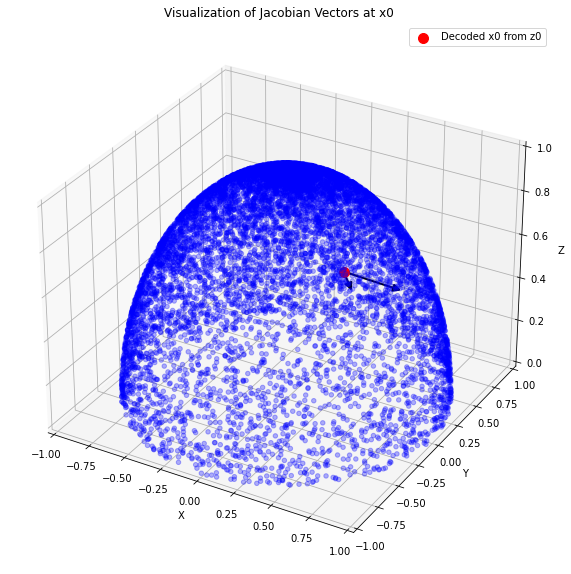

In [34]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Create a class for 3D arrows
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

def visualize_jacobian_at_z0(model, z0):
    # Decode z0 to get x0
    x0 = model.decoder(z0).squeeze()
    x0_np = x0.detach().numpy()
    
    # Compute the Jacobian for z0
    jacobian = compute_jacobian(model, z0).squeeze()
    jacobian_np = jacobian.detach().numpy()
    
    # Set up a 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(hemisphere_data[:, 0], hemisphere_data[:, 1], hemisphere_data[:, 2], c='b', marker='o', alpha=0.3)
    ax.scatter(x0_np[0], x0_np[1], x0_np[2], c='red', s=100, label='Decoded x0 from z0')

    # Plot the Jacobian vectors
    for i in range(jacobian_np.shape[1]):
        arrow = Arrow3D([x0_np[0], x0_np[0] + jacobian_np[0, i]],
                        [x0_np[1], x0_np[1] + jacobian_np[1, i]],
                        [x0_np[2], x0_np[2] + jacobian_np[2, i]],
                        mutation_scale=15, lw=2, arrowstyle="-|>", color="k")
        ax.add_artist(arrow)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([0, 1])
    ax.set_title('Visualization of Jacobian Vectors at x0')
    ax.legend()
    plt.show()


# Visualize the Jacobian vectors for a random point z0 from the latent space
z0 = torch.randn(2).float().unsqueeze(0)
visualize_jacobian_at_z0(vae, z0)


In [45]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def visualize_jacobian_plane_at_z0(model, z0):
    # Decode z0 to get x0
    x0 = model.decoder(z0).squeeze()
    x0_np = x0.detach().numpy()
    
    # Compute the Jacobian for z0
    jacobian = compute_jacobian(model, z0).squeeze()
    jacobian_np = jacobian.detach().numpy()
    
    # Get the two basis vectors from the Jacobian
    v1 = jacobian_np[:, 0]
    v2 = jacobian_np[:, 1]
    
    # Compute four corners of the plane patch
    scale = 1  # scaling factor to control the size of the plane patch
    corner1 = x0_np + scale * v1 + scale * v2
    corner2 = x0_np - scale * v1 + scale * v2
    corner3 = x0_np - scale * v1 - scale * v2
    corner4 = x0_np + scale * v1 - scale * v2
    
    # Set up a 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(hemisphere_data[:, 0], hemisphere_data[:, 1], hemisphere_data[:, 2], c='b', marker='o', alpha=0.3)
    ax.scatter(x0_np[0], x0_np[1], x0_np[2], c='red', s=100, label='Decoded x0 from z0')
    
    # Plot the Jacobian vectors
    for i in range(jacobian_np.shape[1]):
        arrow = Arrow3D([x0_np[0], x0_np[0] + jacobian_np[0, i]],
                        [x0_np[1], x0_np[1] + jacobian_np[1, i]],
                        [x0_np[2], x0_np[2] + jacobian_np[2, i]],
                        mutation_scale=15, lw=2, arrowstyle="-|>", color="k")
        ax.add_artist(arrow)
    
    # Plot the plane spanned by the Jacobian vectors
    vertices = [list(corner1), list(corner2), list(corner3), list(corner4)]
    ax.add_collection3d(Poly3DCollection([vertices], alpha=0.5, facecolors='cyan'))
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([0, 1])
    ax.set_title('Visualization of Jacobian Vectors and Plane at x0')
    ax.legend()
    plt.show()



/var/folders/g2/pxzr9j95129bz38p7d4l_91r0000gn/T/ipykernel_53611/1626585071.py:12: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


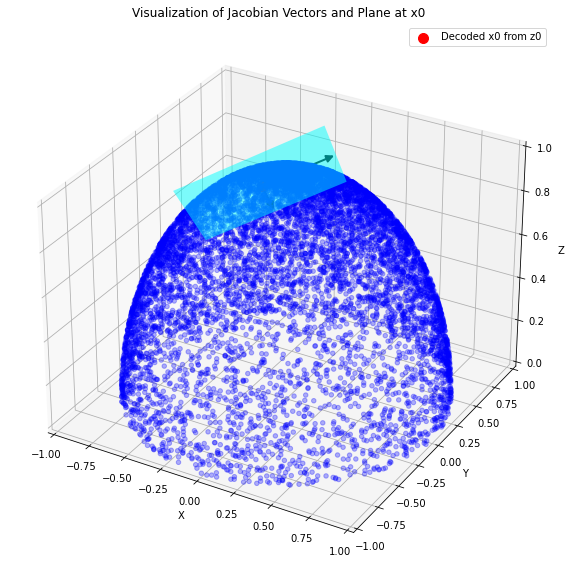

In [50]:
%matplotlib inline
z0 = torch.randn(2).float().unsqueeze(0)
# Visualize the Jacobian vectors and the spanned plane for the same random point z0
visualize_jacobian_plane_at_z0(vae, z0)

In [51]:
def gram_schmidt_batched(A):
    """
    Perform the Gram-Schmidt process on a batch of matrices.
    :param A: Batched tensor of shape (n_batch, m, n).
    :return: Orthonormalized batched tensor.
    """
    n_batch, m, n = A.shape
    Q = torch.zeros_like(A)
    
    for j in range(n):
        # Start with the original vector
        v = A[:, :, j]
        
        # Orthogonalize v w.r.t. the previous vectors in Q
        for k in range(j):
            v = v - (torch.sum(v * Q[:, :, k], dim=1, keepdim=True) * Q[:, :, k])
        
        # Normalize v
        v = v / torch.linalg.norm(v, dim=1, keepdim=True)
        
        # Store in Q
        Q[:, :, j] = v

    return Q

In [52]:

def visualize_jacobian_plane_at_z0_schmidt(model, z0):
    # Decode z0 to get x0
    x0 = model.decoder(z0).squeeze()
    x0_np = x0.detach().numpy()
    
    # Compute the Jacobian for z0
    jacobian = compute_jacobian(model, z0)
    jacobian_np = gram_schmidt_batched(jacobian).squeeze()
    jacobian_np = jacobian_np.detach().numpy()
    
    # Get the two basis vectors from the Jacobian
    v1 = jacobian_np[:, 0]
    v2 = jacobian_np[:, 1]
    
    # Compute four corners of the plane patch
    scale = 1  # scaling factor to control the size of the plane patch
    corner1 = x0_np + scale * v1 + scale * v2
    corner2 = x0_np - scale * v1 + scale * v2
    corner3 = x0_np - scale * v1 - scale * v2
    corner4 = x0_np + scale * v1 - scale * v2
    
    # Set up a 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(hemisphere_data[:, 0], hemisphere_data[:, 1], hemisphere_data[:, 2], c='b', marker='o', alpha=0.3)
    ax.scatter(x0_np[0], x0_np[1], x0_np[2], c='red', s=100, label='Decoded x0 from z0')
    
    # Plot the Jacobian vectors
    for i in range(jacobian_np.shape[1]):
        arrow = Arrow3D([x0_np[0], x0_np[0] + jacobian_np[0, i]],
                        [x0_np[1], x0_np[1] + jacobian_np[1, i]],
                        [x0_np[2], x0_np[2] + jacobian_np[2, i]],
                        mutation_scale=15, lw=2, arrowstyle="-|>", color="k")
        ax.add_artist(arrow)
    
    # Plot the plane spanned by the Jacobian vectors
    vertices = [list(corner1), list(corner2), list(corner3), list(corner4)]
    ax.add_collection3d(Poly3DCollection([vertices], alpha=0.5, facecolors='cyan'))
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([0, 1])
    ax.set_title('Visualization of Jacobian Vectors and Plane at x0')
    ax.legend()
    plt.show()



/var/folders/g2/pxzr9j95129bz38p7d4l_91r0000gn/T/ipykernel_53611/1626585071.py:12: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


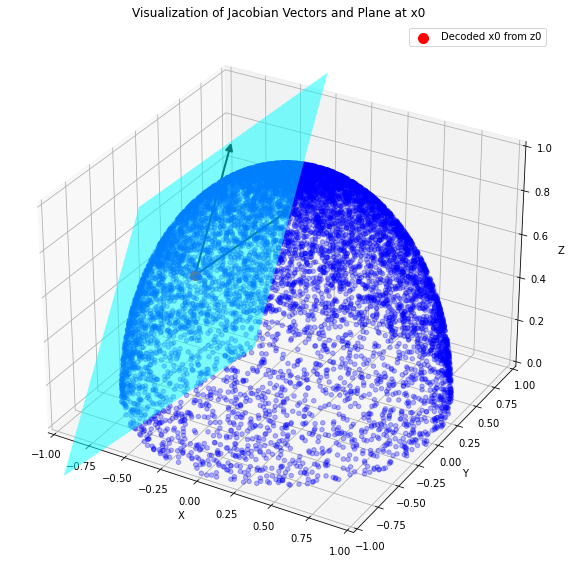

In [67]:
z0 = torch.randn(2).float().unsqueeze(0)
# Visualize the Jacobian vectors and the spanned plane for the same random point z0
visualize_jacobian_plane_at_z0(vae, z0)

In [70]:
compute_jacobian(vae, z0)

tensor([[[ 0.5300, -0.1638],
         [ 0.0927,  0.3935],
         [ 0.2270, -0.0942]]], grad_fn=<CopySlices>)

In [85]:
z_batch = latent_mu.clone().detach().requires_grad_(True)

In [96]:
jac = compute_jacobian(vae, z_batch)

In [97]:
# Orthogonalize the Jacobian tensor using QR decomposition
Q, _ = torch.qr(jac.transpose(1, 2))
orthonormal_basis = Q.transpose(1, 2)


In [98]:
# Compute the metric tensor g_ij using the orthonormal basis
metric_tensor = torch.einsum('bik,bjk->bij', orthonormal_basis, orthonormal_basis)


In [99]:
metric_derivatives_list = []
for l in range(2):
    metric_derivative = torch.autograd.grad(metric_tensor[:, :, l].sum(), z_batch, 
                                            retain_graph=True, create_graph=True)[0]
    metric_derivatives_list.append(metric_derivative)
metric_derivatives = torch.stack(metric_derivatives_list, dim=2)



In [103]:
# Reshape the metric_tensor to treat each slice as a separate item in the batch dimension
latent_dim = z_batch.size(1)
reshaped_metric_tensor = metric_tensor.view(-1, latent_dim)

# Compute the gradient for the entire reshaped tensor
metric_derivatives_reshaped = torch.autograd.grad(reshaped_metric_tensor.sum(), z_batch, 
                                                 retain_graph=True, create_graph=True)[0]

# Reshape the metric_derivatives back to the original shape
metric_derivatives = metric_derivatives_reshaped.view(-1, latent_dim, latent_dim)


In [101]:
# Compute the inverse of the metric tensor g^kl
# metric_tensor_inverse = torch.linalg.inv(metric_tensor)
metric_tensor_inverse = torch.inverse(metric_tensor)

# Compute the Christoffel symbols
christoffel_symbols = 0.5 * (
    torch.einsum('bkl,bij->bkl', metric_tensor_inverse, metric_derivatives) +
    torch.einsum('bkl,bji->bkl', metric_tensor_inverse, metric_derivatives) -
    torch.einsum('bkl,bij->bkl', metric_tensor_inverse, metric_tensor)
)

In [102]:
christoffel_symbols

tensor([[[-1.0000e+00, -2.9802e-08],
         [-2.9802e-08, -1.0000e+00]],

        [[-1.0000e+00,  1.4901e-08],
         [ 1.4901e-08, -1.0000e+00]],

        [[-1.0000e+00, -1.4901e-08],
         [-1.4901e-08, -1.0000e+00]],

        ...,

        [[-1.0000e+00,  2.9802e-08],
         [ 2.9802e-08, -1.0000e+00]],

        [[-1.0000e+00, -1.4901e-08],
         [-1.4901e-08, -1.0000e+00]],

        [[-1.0000e+00,  2.9802e-08],
         [ 2.9802e-08, -1.0000e+00]]], grad_fn=<MulBackward0>)

In [104]:
import torch

# Differentiate the Christoffel symbols with respect to both components of the latent embeddings
christoffel_derivatives_list = []
for k in range(latent_dim):
    for l in range(latent_dim):
        christoffel_derivative = torch.autograd.grad(christoffel_symbols[:, k, l].sum(), z_batch, 
                                                     retain_graph=True, create_graph=True)[0]
        christoffel_derivatives_list.append(christoffel_derivative)

# Reshape and stack the Christoffel derivatives to obtain the final result
christoffel_derivatives = torch.stack(christoffel_derivatives_list, dim=2).view(-1, 2, 2, 2)

# Compute the Riemann curvature tensor
riemann_curvature = (
    christoffel_derivatives - christoffel_derivatives.permute(0, 1, 3, 2) +
    torch.einsum('bim,bjk->bijk', christoffel_symbols, christoffel_symbols) -
    torch.einsum('bjm,bik->bijk', christoffel_symbols, christoffel_symbols)
)

# Compute the Ricci curvature tensor
ricci_tensor = torch.einsum('bijk->bij', riemann_curvature)

# Compute the scalar curvature
scalar_curvature = torch.einsum('bii,bij->b', torch.inverse(metric_tensor), ricci_tensor)


(array([  82.,   65.,   89.,  164.,   37., 9233.,  254.,   11.,   23.,
          42.]),
 array([-4.2632564e-14, -3.4106053e-14, -2.5579538e-14, -1.7053026e-14,
        -8.5265132e-15,  0.0000000e+00,  8.5265132e-15,  1.7053026e-14,
         2.5579538e-14,  3.4106053e-14,  4.2632564e-14], dtype=float32),
 <BarContainer object of 10 artists>)

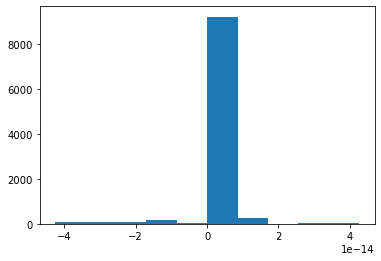

In [106]:
plt.hist(scalar_curvature.detach().numpy())

In [107]:
metric_tensor

tensor([[[ 1.0000e+00, -2.9802e-08],
         [-2.9802e-08,  1.0000e+00]],

        [[ 1.0000e+00,  1.4901e-08],
         [ 1.4901e-08,  1.0000e+00]],

        [[ 1.0000e+00, -1.4901e-08],
         [-1.4901e-08,  1.0000e+00]],

        ...,

        [[ 1.0000e+00,  2.9802e-08],
         [ 2.9802e-08,  1.0000e+00]],

        [[ 1.0000e+00, -1.4901e-08],
         [-1.4901e-08,  1.0000e+00]],

        [[ 1.0000e+00,  2.9802e-08],
         [ 2.9802e-08,  1.0000e+00]]], grad_fn=<ViewBackward>)

In [108]:
orthonormal_basis

tensor([[[-0.9013, -0.4331],
         [-0.4331,  0.9013]],

        [[-0.9848,  0.1739],
         [ 0.1739,  0.9848]],

        [[-0.9808,  0.1949],
         [ 0.1949,  0.9808]],

        ...,

        [[-0.8707,  0.4918],
         [ 0.4918,  0.8707]],

        [[-0.9725,  0.2330],
         [ 0.2330,  0.9725]],

        [[-0.9450,  0.3270],
         [ 0.3270,  0.9450]]], grad_fn=<TransposeBackward0>)

In [109]:

def visualize_jacobian_plane_at_z0_qr(model, z0):
    # Decode z0 to get x0
    x0 = model.decoder(z0).squeeze()
    x0_np = x0.detach().numpy()
    
    # Compute the Jacobian for z0
    jacobian = compute_jacobian(model, z0)
    Q, _ = torch.qr(jacobian.transpose(1, 2))
    jacobian_np = Q.transpose(1, 2)
    # jacobian_np = gram_schmidt_batched(jacobian).squeeze()
    jacobian_np = jacobian_np.detach().numpy()
    
    # Get the two basis vectors from the Jacobian
    v1 = jacobian_np[:, 0]
    v2 = jacobian_np[:, 1]
    
    # Compute four corners of the plane patch
    scale = 1  # scaling factor to control the size of the plane patch
    corner1 = x0_np + scale * v1 + scale * v2
    corner2 = x0_np - scale * v1 + scale * v2
    corner3 = x0_np - scale * v1 - scale * v2
    corner4 = x0_np + scale * v1 - scale * v2
    
    # Set up a 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(hemisphere_data[:, 0], hemisphere_data[:, 1], hemisphere_data[:, 2], c='b', marker='o', alpha=0.3)
    ax.scatter(x0_np[0], x0_np[1], x0_np[2], c='red', s=100, label='Decoded x0 from z0')
    
    # Plot the Jacobian vectors
    for i in range(jacobian_np.shape[1]):
        arrow = Arrow3D([x0_np[0], x0_np[0] + jacobian_np[0, i]],
                        [x0_np[1], x0_np[1] + jacobian_np[1, i]],
                        [x0_np[2], x0_np[2] + jacobian_np[2, i]],
                        mutation_scale=15, lw=2, arrowstyle="-|>", color="k")
        ax.add_artist(arrow)
    
    # Plot the plane spanned by the Jacobian vectors
    vertices = [list(corner1), list(corner2), list(corner3), list(corner4)]
    ax.add_collection3d(Poly3DCollection([vertices], alpha=0.5, facecolors='cyan'))
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([0, 1])
    ax.set_title('Visualization of Jacobian Vectors and Plane at x0')
    ax.legend()
    plt.show()



In [110]:
z0 = torch.randn(2).float().unsqueeze(0)
# Visualize the Jacobian vectors and the spanned plane for the same random point z0
visualize_jacobian_plane_at_z0_qr(vae, z0)

ValueError: operands could not be broadcast together with shapes (3,) (1,2) 

In [111]:
metric_derivatives_reshaped

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        ...,
        [0., 0.],
        [0., 0.],
        [0., 0.]], grad_fn=<MmBackward>)

In [112]:
# Compute the Jacobian of the orthonormal_basis with respect to the latent embeddings
jacobian_list = []
for k in range(latent_dim):
    jacobian_k = torch.autograd.functional.jacobian(lambda z: orthonormal_basis[:, :, k], z_batch)
    jacobian_list.append(jacobian_k)

# Stack the Jacobians to get the full derivative tensor
full_jacobian = torch.stack(jacobian_list, dim=2)

# Compute the Christoffel symbols using the full Jacobian
christoffel_symbols_from_jacobian = torch.einsum('bik,bijk->bij', orthonormal_basis, full_jacobian)

KeyboardInterrupt: 

In [114]:
# Differentiate the orthonormal_basis with respect to the latent embeddings for each basis vector
basis_derivatives_list_autograd = []
for k in range(latent_dim):
    basis_derivative_k = torch.autograd.grad(outputs=orthonormal_basis[:, :, k].sum(), 
                                             inputs=z_batch, 
                                             retain_graph=True, create_graph=True)[0]
    basis_derivatives_list_autograd.append(basis_derivative_k)

# Stack the basis derivatives
basis_derivatives_autograd = torch.stack(basis_derivatives_list_autograd, dim=2)

# Compute the Christoffel symbols using the basis derivatives from autograd
christoffel_symbols_from_autograd = torch.einsum('bik,bijk->bij', orthonormal_basis, basis_derivatives_autograd)

# Verify the shape to ensure correctness
christoffel_symbols_from_autograd.shape


RuntimeError: dimension mismatch for operand 1: equation 4 tensor 3

In [115]:
# Step 1: Ensure the decoder's output requires gradients

# Set requires_grad to True for the latent embeddings
z_batch.requires_grad = True

# Get the decoder output
decoder_output_with_grad = vae.decoder(z_batch)

# Step 2: Compute the Jacobian of the decoder output with respect to the latent embeddings
jacobian_with_grad = torch.autograd.functional.jacobian(lambda z: vae.decoder(z).squeeze(), z_batch)

# Step 3: Use the Jacobian to compute the Christoffel symbols
# The Christoffel symbols can be computed as:
# Γᵢⱼᵏ = 0.5 * gᵢˡ ( ∂gⱼˡ/∂xᵏ + ∂gⱼᵏ/∂xˡ - ∂gˡᵏ/∂xⱼ )
# Where gᵢⱼ is the metric tensor. Since we're in a Euclidean space, gᵢⱼ = δᵢⱼ (Kronecker delta).
# This simplifies the Christoffel symbols to:
# Γᵢⱼᵏ = 0.5 * ( ∂gⱼᵢ/∂xᵏ + ∂gⱼᵏ/∂xᵢ - ∂gᵢᵏ/∂xⱼ )

# Extract the required partial derivatives from the Jacobian
partial_g_ji_k = jacobian_with_grad[:, :, 0, 1]
partial_g_jk_i = jacobian_with_grad[:, :, 1, 0]
partial_g_ik_j = jacobian_with_grad[:, :, 0, 0]

# Compute the Christoffel symbols
christoffel_symbols_with_grad = 0.5 * (partial_g_ji_k + partial_g_jk_i - partial_g_ik_j)

christoffel_symbols_with_grad.shape


torch.Size([10000, 3])

In [122]:
jacobian_with_grad.size()

torch.Size([10000, 3, 10000, 2])

In [123]:
jacobian_with_grad[0, :, 0, :]

tensor([[ 0.2881,  0.1385],
        [ 0.2950,  0.3930],
        [ 0.1968, -0.1661]])

In [125]:
jacobian_with_grad[1, :, 1, :]

tensor([[ 0.4075, -0.0719],
        [ 0.2129,  0.4154],
        [-0.3180,  0.1804]])

In [128]:
def compute_jacobian(model, z_batch):
    """
    Compute the Jacobian of the decoder wrt a batch of points in the latent space using an efficient broadcasting approach.
    :param model: The VAE model.
    :param z_batch: A batch of points in the latent space (tensor).
    :return: A batch of Jacobian matrices.
    """
    # z_batch = z_batch.clone().detach().requires_grad_(True)
    z_batch.requires_grad_(True)
    model.no_grad()
    output = model.decoder(z_batch)
    batch_size, output_dim, latent_dim = *output.shape, z_batch.shape[-1]

    # Use autograd's grad function to get gradients for each output dimension
    jacobian = torch.zeros(batch_size, output_dim, latent_dim).to(z_batch.device)
    for i in range(output_dim):
        grad_outputs = torch.zeros(batch_size, output_dim).to(z_batch.device)
        grad_outputs[:, i] = 1.0
        gradients = grad(outputs=output, inputs=z_batch, grad_outputs=grad_outputs, create_graph=True, retain_graph=True, only_inputs=True)[0]
        jacobian[:, i, :] = gradients

    return jacobian

In [131]:
jac3 = compute_jacobian(vae, z_batch)

ModuleAttributeError: 'VAE' object has no attribute 'no_grad'